## Decision Tree Regression (contineoues output value)

In [ ]:
##import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
## load dataset
from sklearn.datasets import fetch_california_housing

In [ ]:
data=fetch_california_housing()
print(data)

In [ ]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df.head()

In [ ]:
df['target']=data.target

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df=df.sample(frac=0.25)

In [ ]:
df.shape

In [ ]:
## independent and depende feature
X=df.drop('target',axis=1)
y=df['target']

In [ ]:
## train test split
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, X_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

## decision tree regression

In [38]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
reg=DecisionTreeRegressor()

In [41]:
reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [42]:
y_predict=reg.predict(X_test)
y_predict

array([3.918, 1.372, 1.738, ..., 1.589, 2.025, 3.683])

In [43]:
y_test

18146    2.92900
10486    2.31400
2349     1.63100
19898    0.69100
20064    0.96200
          ...   
8876     5.00001
13063    1.09400
5910     1.67000
4984     1.11600
18290    5.00001
Name: target, Length: 1703, dtype: float64

In [57]:
from sklearn import tree

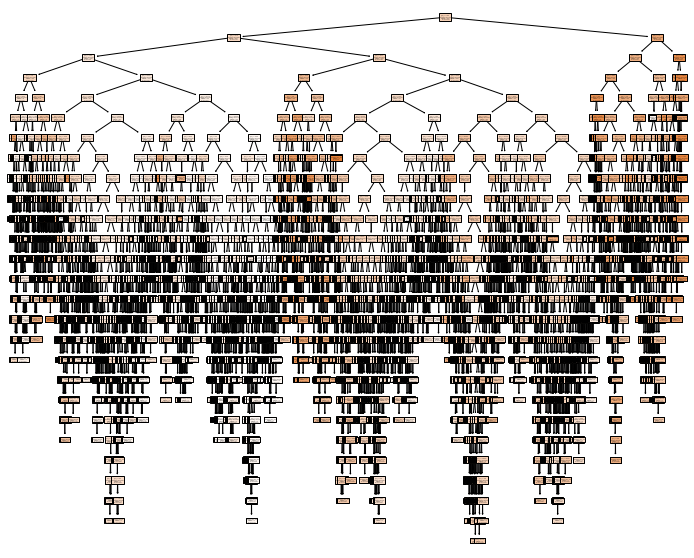

In [62]:
plt.figure(figsize=(12,10))
tree.plot_tree(reg,filled=True)
plt.show()

## calculate the accuracy

In [44]:
from sklearn.metrics import r2_score

In [45]:
score=r2_score(y_predict,y_test)

In [46]:
print('accurcay',score)

accurcay 0.5302917916601371


## Hyper parameeter tuning with grid search cv

In [49]:
parameter={
 'criterion' : ("squared_error", "friedman_mse", "absolute_error","poisson"),
  'splitter' : ('best', 'random'),
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
    'max_features' :("auto", "sqrt", "log2")
}

In [50]:
from sklearn.model_selection import GridSearchCV

In [53]:
## https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py
cv=GridSearchCV(reg,param_grid=parameter,scoring='neg_mean_squared_error',cv=2)
cv.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ('squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'splitter': ('best', 'random')},
             scoring='neg_mean_squared_error')

In [55]:
y_predi=cv.predict(X_test)

In [56]:
cv.best_params_

{'criterion': 'absolute_error',
 'max_depth': 7,
 'max_features': 'auto',
 'splitter': 'best'}

In [59]:
reg_Cv=DecisionTreeRegressor(criterion='absolute_error',max_depth=7,max_features='auto',splitter='best')

In [60]:
reg_Cv.fit(X_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      max_features='auto')

In [63]:
reg_Cv.predict(X_test)

array([3.918 , 2.274 , 2.469 , ..., 1.876 , 1.563 , 3.2275])

In [ ]:
predict